In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import integrate

## Lorenz System Plots:

In [10]:
# Generate training and validation data.
def lorenz(u, *args):
    x, y, z = u[0], u[1], u[2]
    beta, rho, sigma = alpha[0], alpha[1], alpha[2]
    
    return np.asarray([sigma*(y - x), x*(rho - z) - y, x*y - beta*z])


# Generate Lorenz system trajectory.
T = 20
dt = 0.01
alpha = (8.0/3.0, 28.0, 10.0)
x0 = np.random.uniform(low=-5, high=5, size=3)
t = np.linspace(0, T, int(T/dt))
x = integrate.odeint(lorenz, x0, t, args=alpha)

# Generate perturbed trajectories.
delta = 1e-4
k = 10
u = np.random.uniform(low=-1, high=1, size=(k,3))
delta_x0 = [x0 + delta/np.linalg.norm(u[i])*u[i] for i in range(k)]
delta_x = [integrate.odeint(lorenz, delta_x0[i], t, args=alpha) for i in range(k)]

In [11]:
x0

array([-1.57549769,  2.09425902,  0.20420932])

Text(0.5, 0.8, 'Chaotic Dynamics of the Lorenz System')

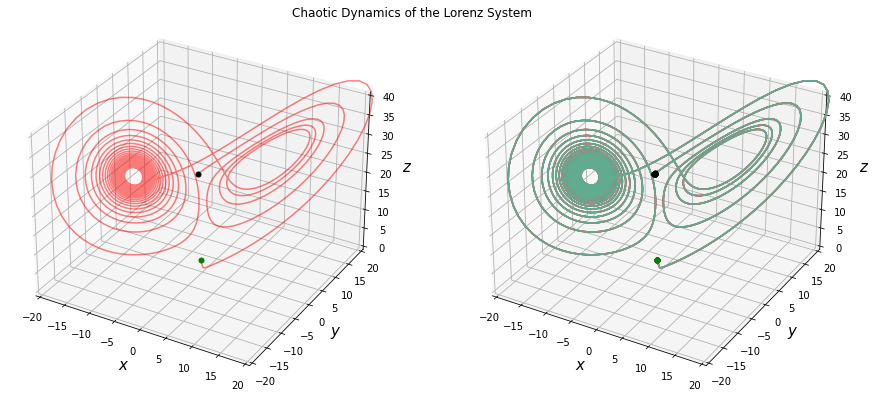

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot trajectories.
ax1.plot(x[:-1,0], x[:-1,1], x[:-1,2], 'r-', markersize=1.0, alpha=0.5, label='Lorenz Trajectory')
ax2.plot(x[:-1,0], x[:-1,1], x[:-1,2], 'r-', markersize=1.0, alpha=0.5, label='Lorenz Trajectory')
for i in range(k):
    ax2.plot(delta_x[i][:,0], delta_x[i][:,1], delta_x[i][:,2], '-', markersize=1.0, alpha=0.5)


# Plot green and black points and start and end of each trajectory.
for i in range(k):
    ax2.plot(delta_x[i][-1,0], delta_x[i][-1,1], delta_x[i][-1,2], 'ko', markersize=5.0, alpha=1)
    ax2.plot(delta_x[i][0,0], delta_x[i][0,1], delta_x[i][0,2], 'go', markersize=5.0, alpha=1)
ax1.plot(x[-1,0], x[-1,1], x[-1,2], 'ko', markersize=5.0, alpha=1)
ax1.plot(x[0,0], x[0,1], x[0,2], 'go', markersize=5.0, alpha=1)

ax2.plot(x[-1,0], x[-1,1], x[-1,2], 'ko', markersize=5.0, alpha=1)
ax2.plot(x[0,0], x[0,1], x[0,2], 'go', markersize=5.0, alpha=1)
    
xlim, ylim, zlim = 20, 20, 40
ax1.set_xlim(-xlim, xlim)
ax1.set_ylim(-ylim, ylim)
ax1.set_zlim(0, zlim)

ax1.set_xlabel('$x$', rotation=False, fontsize=15)
ax1.set_ylabel('$y$', rotation=False, fontsize=15)
ax1.set_zlabel('$z$', rotation=False, fontsize=15)

ax2.set_xlabel('$x$', rotation=False, fontsize=15)
ax2.set_ylabel('$y$', rotation=False, fontsize=15)
ax2.set_zlabel('$z$', rotation=False, fontsize=15)

ax2.set_xlim(-xlim, xlim)
ax2.set_ylim(-ylim, ylim)
ax2.set_zlim(0, zlim)
fig.suptitle('Chaotic Dynamics of the Lorenz System', y=0.8)


## Untrained Attractors Plots:

In [13]:
attractor_encoding = { 
    (0, 0, 0):0, (1, 0, 0):1, (2, 0, 0):2, (5, 0, 0):3,
    (0, 1, 0):4, (1, 1, 0):5, (2, 1, 0):6, (2, 1, 1):7,
    (1, 0, 1):8, (2, 0, 1):9, (1, 1, 1):10, (3, 1, 1):11,
    (0, 1, 1):12, (0, 0, 1):13
}

rev_encoding = {v: k for k, v in attractor_encoding.items()}

def tuple_to_label(x):
    if max(x) == 0 and min(x) == 0:
        label = "No UAs"
    else:
        label = []
        if x[0] != 0:
            label.append(str(x[0]) + " FP, ")
        if x[1] != 0:
            label.append(str(x[1]) + " LC, ")
        if x[2] != 0:
            label.append(str(x[2]) + " other ")
        label = "".join(label)
    if label[-2:] ==', ':
        label = label[:-2]
    return label

In [14]:
ESN_ua_mat

NameError: name 'ESN_ua_mat' is not defined

Text(0.5, 1.0, 'ESN')

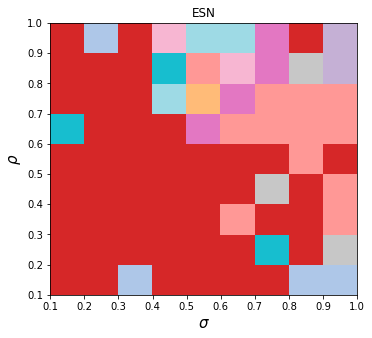

In [183]:
fig, ax = plt.subplots(figsize=(5.5,5))
ua_mat = ESN_ua_mat
plt.imshow(ua_mat,
           origin='lower', extent=[0.1, 1.0, 0.1, 1.0], 
           aspect='auto',
           cmap=plt.cm.get_cmap('tab20', 14))

formatter = plt.FuncFormatter(lambda val, loc: tuple_to_label(rev_encoding[val]))

# We must be sure to specify the ticks matching our target names
#plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], format=formatter);

# Set the clim so that labels are centered on each block
plt.clim(-0.5, 13.5)

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

plt.xlabel(r'$\sigma$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.title('ESN')
#plt.title("Untrained attractors in predicting reservoir state space", fontsize=20)

In [166]:
SP_ua_mat

array([[ 4.,  4.,  4.,  1.,  1.,  5.,  0.,  8., 11.],
       [ 0.,  4.,  4.,  0.,  0., 12., 13., 13.,  8.],
       [ 0.,  0.,  4.,  0.,  0.,  0., 10.,  8.,  8.],
       [ 0.,  0.,  4.,  4.,  4., 13., 10.,  8.,  8.],
       [ 0.,  4.,  0.,  4.,  0.,  1.,  8.,  8.,  8.],
       [ 0.,  4.,  4.,  4.,  4.,  1.,  8.,  8.,  8.],
       [ 4.,  4.,  0.,  4., 13.,  5.,  8.,  1.,  8.],
       [ 4.,  4.,  0.,  4.,  6., 10.,  8.,  1.,  9.],
       [ 4.,  4.,  0.,  0.,  1.,  5.,  1.,  1.,  1.]])

In [15]:
ESN_ua_mat = np.genfromtxt("ESN_attractors.csv", delimiter=',')
SP_ua_mat = np.genfromtxt("SP_attractors.csv", delimiter=',')
IP_ua_mat = np.genfromtxt("IP_attractors.csv", delimiter=',')
SP_IP_ua_mat = np.genfromtxt("SP_IP_attractors.csv", delimiter=',')
IP_SP_ua_mat = np.genfromtxt("IP_SP_attractors.csv", delimiter=',')

matrix_list = [ESN_ua_mat, SP_ua_mat, IP_ua_mat, SP_IP_ua_mat, IP_SP_ua_mat]

titles = ["ESN", "SP ESN", "IP ESN", "SP-IP ESN", "IP-SP ESN"]

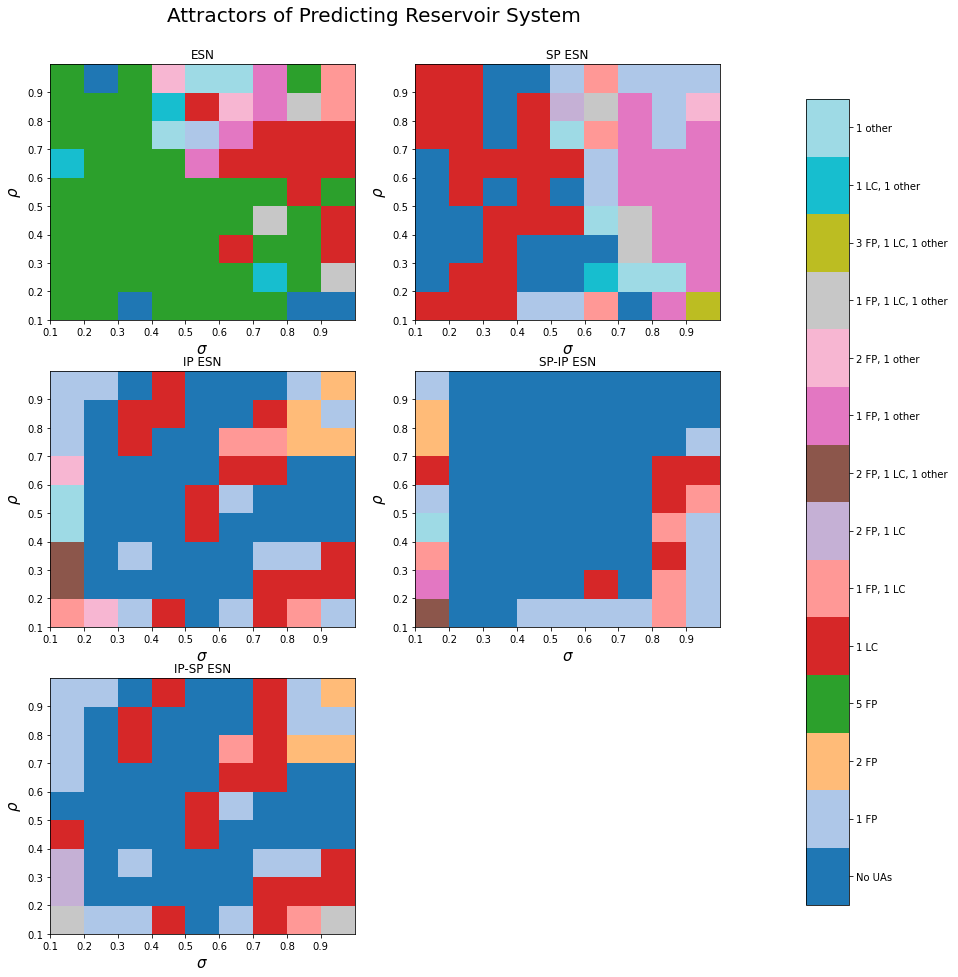

In [16]:
fig = plt.figure(figsize=(12,16))

for i in range(5):
    M = matrix_list[i]
    plt.subplot(3, 2, i+1)
    im = plt.imshow(M,
        origin='lower', extent=[0.1, 1.0, 0.1, 1.0], 
        aspect='auto',
        cmap=plt.cm.get_cmap('tab20', 14))
    plt.title(titles[i])
    plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
    plt.xlabel(r'$\sigma$', fontsize=15)
    plt.ylabel(r'$\rho$', fontsize=15)
    
fig.suptitle('Attractors of Predicting Reservoir System', fontsize=20, y=0.93)
cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
formatter = plt.FuncFormatter(lambda val, loc: tuple_to_label(rev_encoding[val]))
fig.colorbar(im, cax=cbar_ax, ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], format=formatter)
plt.clim(-0.5, 13.5)

## Log TPE Plots:

In [17]:
ESN_TPE_mat = np.genfromtxt("ESN_log_TPE.csv", delimiter=',')
SP_TPE_mat = np.genfromtxt("SP_log_TPE.csv", delimiter=',')
IP_TPE_mat = np.genfromtxt("IP_log_TPE.csv", delimiter=',')
SP_IP_TPE_mat = np.genfromtxt("SP_IP_log_TPE.csv", delimiter=',')
IP_SP_TPE_mat = np.genfromtxt("IP_SP_log_TPE.csv", delimiter=',')

matrix_list = [ESN_TPE_mat, SP_TPE_mat, IP_TPE_mat, SP_IP_TPE_mat, IP_SP_TPE_mat]

titles = ["ESN", "SP ESN", "IP ESN", "SP-IP ESN", "IP-SP ESN"]

Text(0.5, 0.93, 'Prediction Log Testing Phase Error')

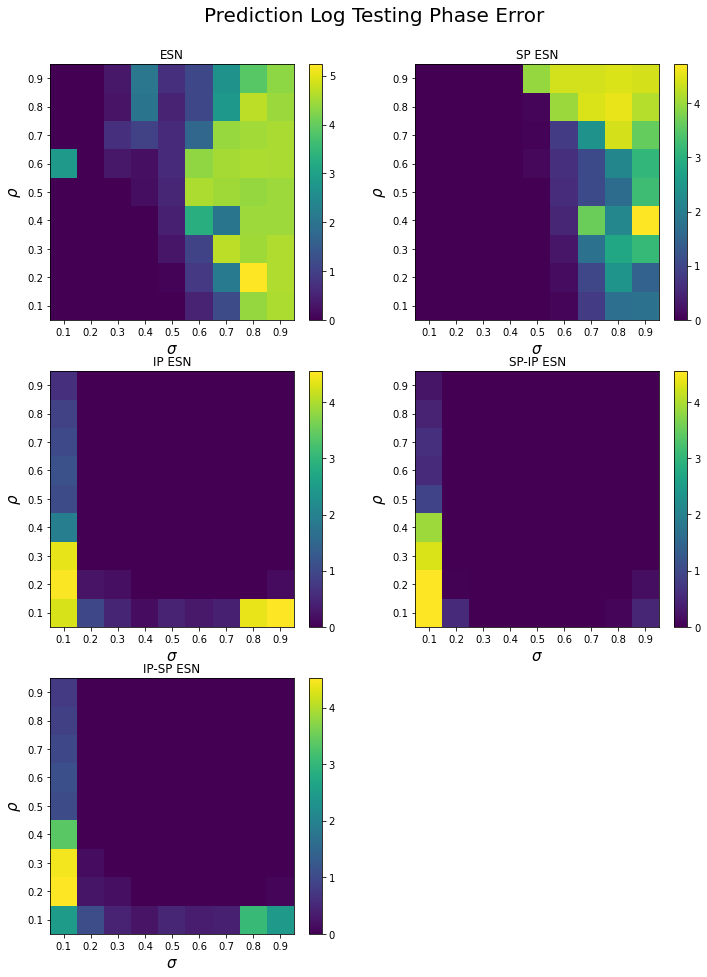

In [40]:
fig = plt.figure(figsize=(12,16))

ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
tick_labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in range(5):
    M = matrix_list[i]
    ax = fig.add_subplot(3, 2, i+1)
    im = ax.imshow(M, origin='lower',
    vmax=M.max(), vmin=0, aspect='auto')
    fig.colorbar(im, ax=ax)
    ax.set_title(titles[i])
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)
    ax.set_xlabel(r'$\sigma$', fontsize=15)
    ax.set_ylabel(r'$\rho$', fontsize=15)

# fig.subplots_adjust(left, bottom, right, top, wspace, hspace)
fig.suptitle('Prediction Log Testing Phase Error', fontsize=20, y=0.93)

## Reconstruction Proportion Plots:

In [42]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [43]:
ESN_rp_mat = np.genfromtxt("ESN_rp.csv", delimiter=',')
SP_rp_mat = np.genfromtxt("SP_rp.csv", delimiter=',')
IP_rp_mat = np.genfromtxt("IP_rp.csv", delimiter=',')
SP_IP_rp_mat = np.genfromtxt("SP_IP_rp.csv", delimiter=',')
IP_SP_rp_mat = np.genfromtxt("IP_SP_rp.csv", delimiter=',')

matrix_list = [ESN_rp_mat, SP_rp_mat, IP_rp_mat, SP_IP_rp_mat, IP_SP_rp_mat]

titles = ["ESN", "SP ESN", "IP ESN", "SP-IP ESN", "IP-SP ESN"]

<ipython-input-243-7f4a5723ce5e>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
<ipython-input-243-7f4a5723ce5e>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


Text(0.5, 0.93, 'Reconstruction Proportion of Predicting Reservoir System')

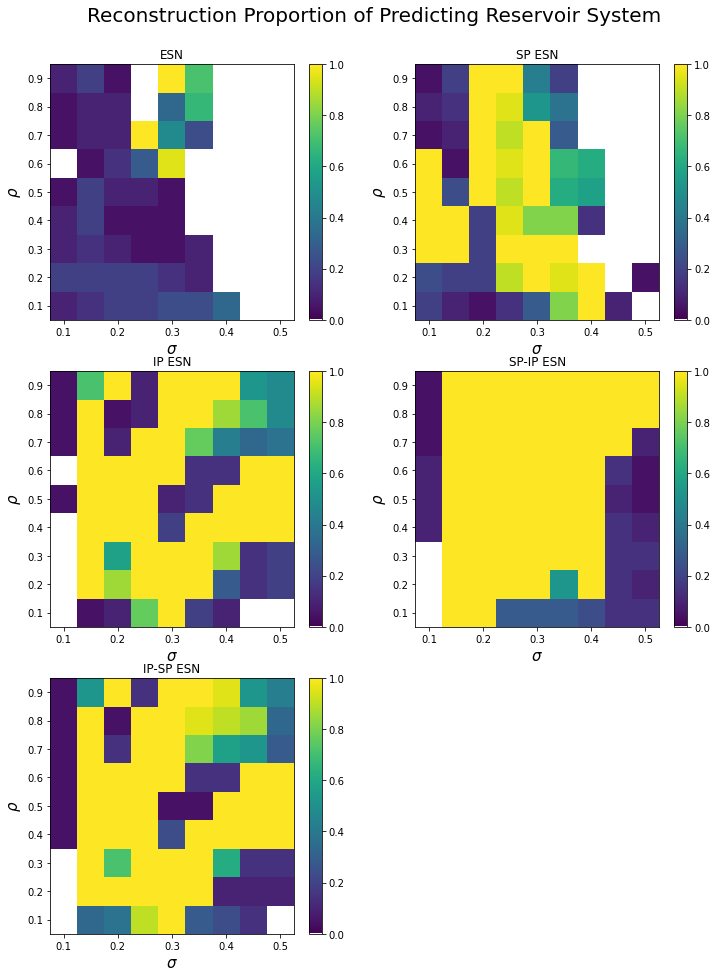

In [243]:
fig = plt.figure(figsize=(12,16))

# Set up colour map.
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[0, :] = white
newcmp = ListedColormap(newcolors)

for i in range(5):
    M = matrix_list[i]
    ax = fig.add_subplot(3, 2, i+1)
    im = ax.imshow(M, vmax=M.max(), vmin=0, origin='lower',
                   cmap=newcmp, aspect='auto')
    fig.colorbar(im, ax=ax)
    ax.set_title(titles[i])
    ax.set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax.set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax.set_xlabel(r'$\sigma$', fontsize=15)
    ax.set_ylabel(r'$\rho$', fontsize=15)
    
# left  = 0.125  # the left side of the subplots of the figure
# right = 1.1   # the right side of the subplots of the figure
# bottom = 0.1   # the bottom of the subplots of the figure
# top = 0.9      # the top of the subplots of the figure
# wspace = 0.2   # the amount of width reserved for blank space between subplots
# hspace = 0.2   # the amount of height reserved for white space between subplots

# fig.subplots_adjust(left, bottom, right, top, wspace, hspace)
fig.suptitle('Reconstruction Proportion of Predicting Reservoir System', fontsize=20, y=0.93)

Text(0.5, 0.93, 'Reconstruction Proportion of Predicting Reservoir System')

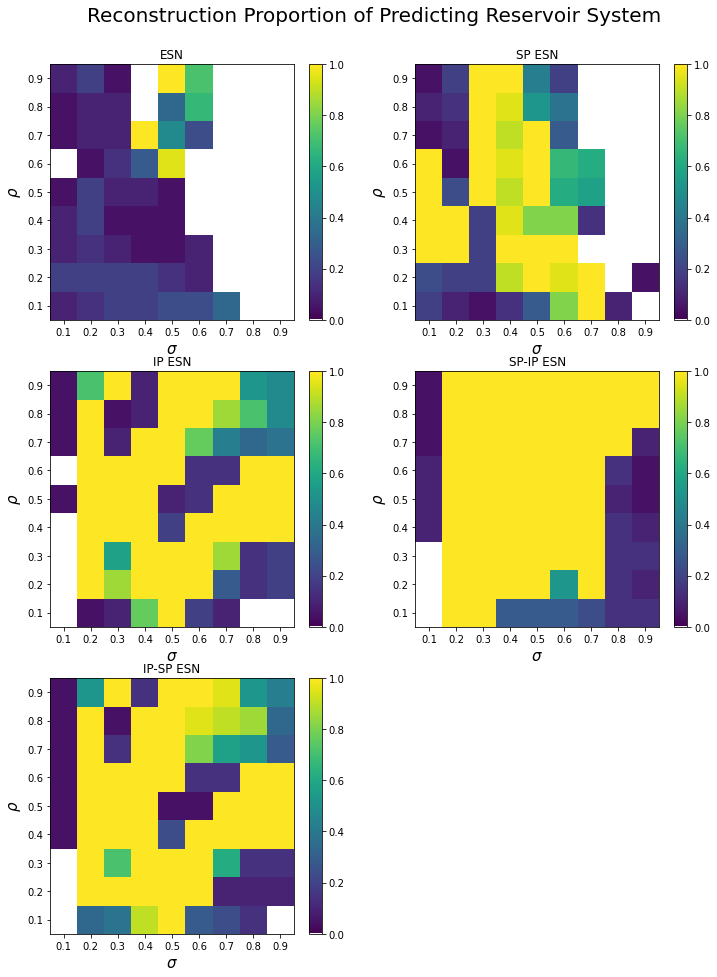

In [45]:
fig = plt.figure(figsize=(12,16))

# Set up colour map.
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
white = np.array([256/256, 256/256, 256/256, 1])
newcolors[0, :] = white
newcmp = ListedColormap(newcolors)

ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8]
tick_labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in range(5):
    M = matrix_list[i]
    ax = fig.add_subplot(3, 2, i+1)
    im = ax.imshow(M, vmax=M.max(), vmin=0, origin='lower',
                   cmap=newcmp, aspect='auto')
    fig.colorbar(im, ax=ax)
    ax.set_title(titles[i])
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(tick_labels)
    ax.set_yticklabels(tick_labels)
    ax.set_xlabel(r'$\sigma$', fontsize=15)
    ax.set_ylabel(r'$\rho$', fontsize=15)

# fig.subplots_adjust(left, bottom, right, top, wspace, hspace)
fig.suptitle('Reconstruction Proportion of Predicting Reservoir System', fontsize=20, y=0.93)

## Synaptic Plasticity Rule Plots:

In [ ]:
matrix_list = [ESN_ua_mat, SP_ua_mat, ESN_TPE_mat, SP_TPE_mat, ESN_rp_mat, SP_rp_mat]

In [260]:
def log_tpe_plots(ESN_mat, PESN_mat, PESN_name):
    fig, ax = plt.subplots(1, 2, figsize=(16,6))

    im = ax[0].imshow(ESN_mat, origin='lower',
                  vmax=ESN_mat.max(), vmin=0, aspect='auto')
    fig.colorbar(im, ax=ax[0])
    ax[0].set_title('ESN', fontsize=15)
    ax[0].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax[0].set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax[0].set_xlabel(r'$\sigma$', fontsize=20)
    ax[0].set_ylabel(r'$\rho$', fontsize=20)

    im = ax[1].imshow(PESN_mat, origin='lower',
                      vmax=PESN_mat.max(), vmin=0, aspect='auto')
    fig.colorbar(im, ax=ax[1])
    ax[1].set_title(PESN_name, fontsize=15)
    ax[1].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax[1].set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax[1].set_xlabel(r'$\sigma$', fontsize=20)
    ax[1].set_ylabel(r'$\rho$', fontsize=20)
    
    fig.suptitle('Prediction Log Testing Phase Error', fontsize=20)

<ipython-input-260-a86ba0ff959d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
<ipython-input-260-a86ba0ff959d>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
<ipython-input-260-a86ba0ff959d>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
<ipython-input-260-a86ba0ff959d>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


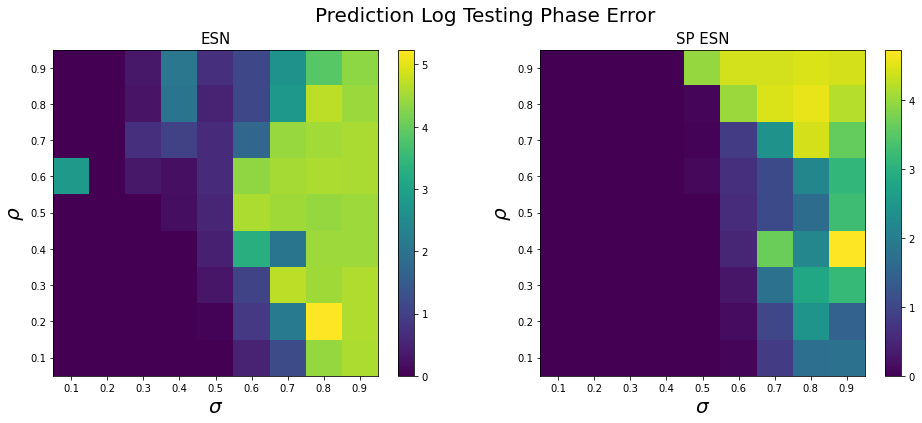

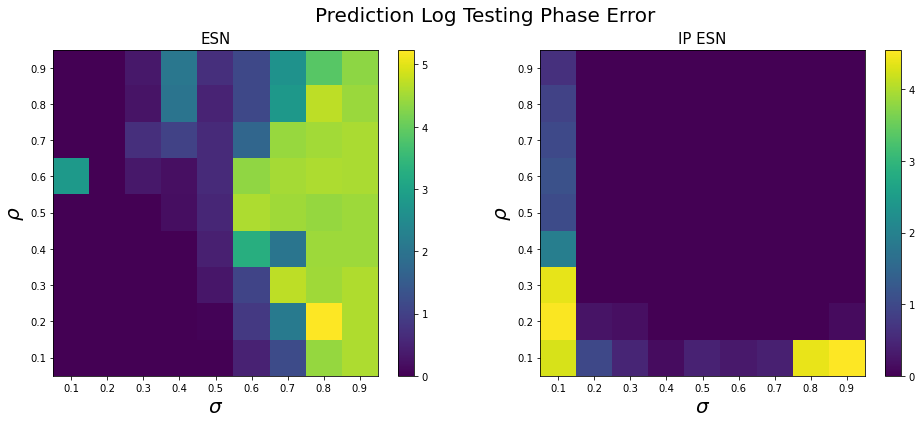

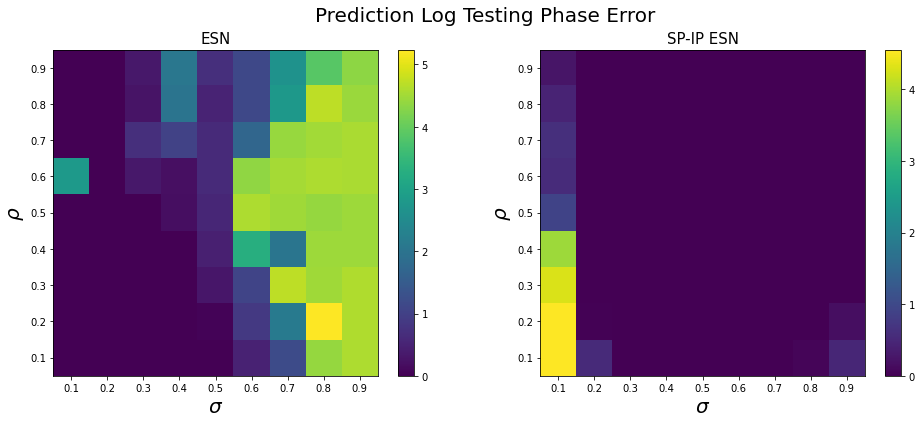

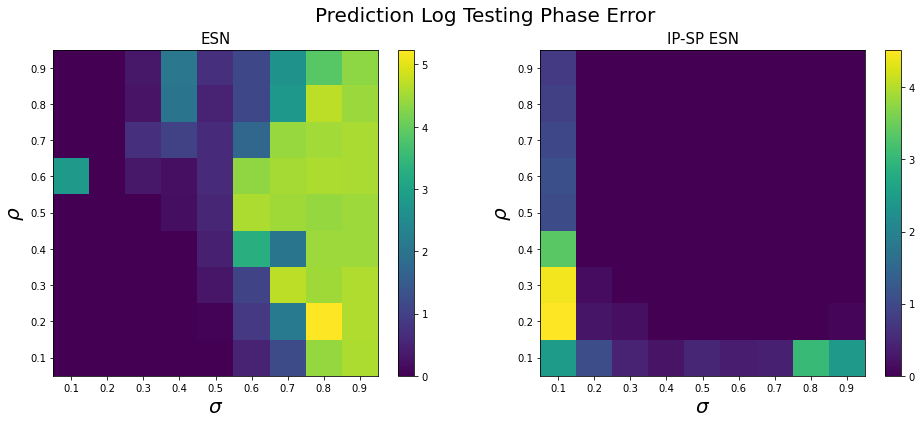

In [261]:
log_tpe_plots(ESN_TPE_mat, SP_TPE_mat, 'SP ESN')
log_tpe_plots(ESN_TPE_mat, IP_TPE_mat, 'IP ESN')
log_tpe_plots(ESN_TPE_mat, SP_IP_TPE_mat, 'SP-IP ESN')
log_tpe_plots(ESN_TPE_mat, IP_SP_TPE_mat, 'IP-SP ESN')

In [268]:
def rp_plots(ESN_mat, PESN_mat, PESN_name):
    fig, ax = plt.subplots(1, 2, figsize=(16,6))

    # Set up colour map.
    viridis = cm.get_cmap('viridis', 256)
    newcolors = viridis(np.linspace(0, 1, 256))
    white = np.array([256/256, 256/256, 256/256, 1])
    newcolors[0, :] = white
    newcmp = ListedColormap(newcolors)

    im = ax[0].imshow(ESN_mat, vmax=ESN_mat.max(), vmin=0, origin='lower',
                   cmap=newcmp, aspect='auto')
    fig.colorbar(im, ax=ax[0])
    ax[0].set_title('ESN', fontsize=15)
    ax[0].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax[0].set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax[0].set_xlabel(r'$\sigma$', fontsize=20)
    ax[0].set_ylabel(r'$\rho$', fontsize=20)

    im = ax[1].imshow(PESN_mat, vmax=PESN_mat.max(), vmin=0, origin='lower',
                   cmap=newcmp, aspect='auto')
    fig.colorbar(im, ax=ax[1])
    ax[1].set_title(PESN_name, fontsize=15)
    ax[1].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax[1].set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    ax[1].set_xlabel(r'$\sigma$', fontsize=20)
    ax[1].set_ylabel(r'$\rho$', fontsize=20)
    
    fig.suptitle('Reconstruction Proportion of Predicting Reservoir System', fontsize=20)

<ipython-input-268-44bfb5826ef9>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
<ipython-input-268-44bfb5826ef9>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
<ipython-input-268-44bfb5826ef9>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
<ipython-input-268-44bfb5826ef9>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])


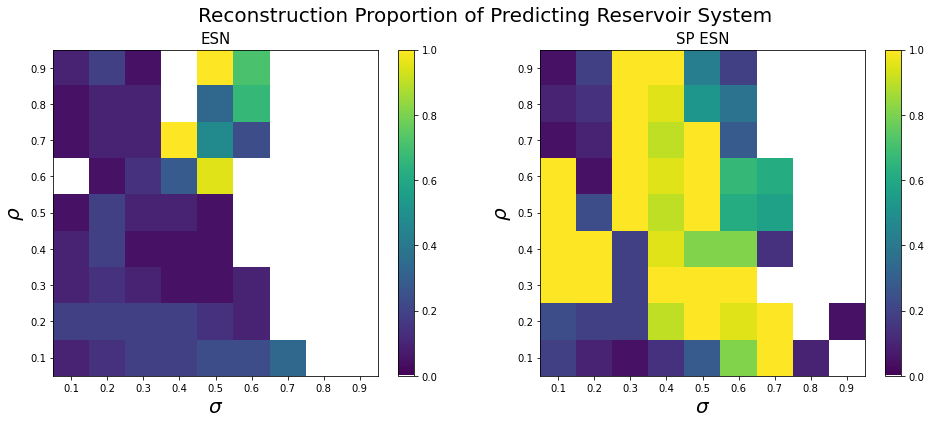

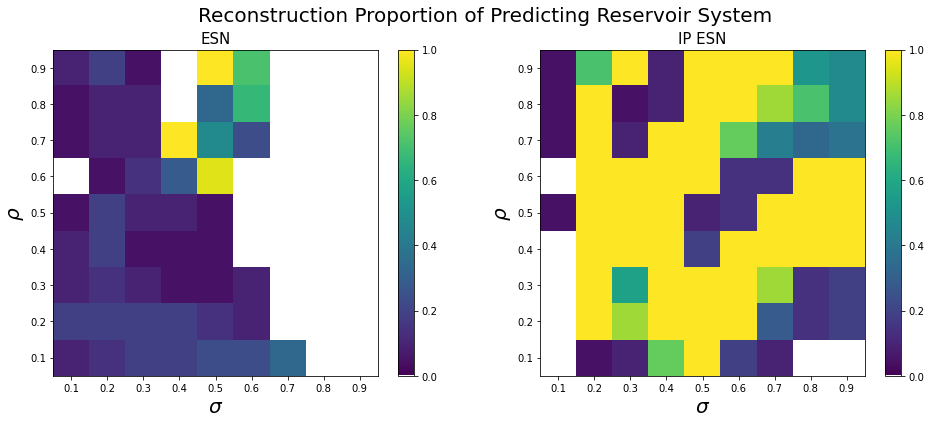

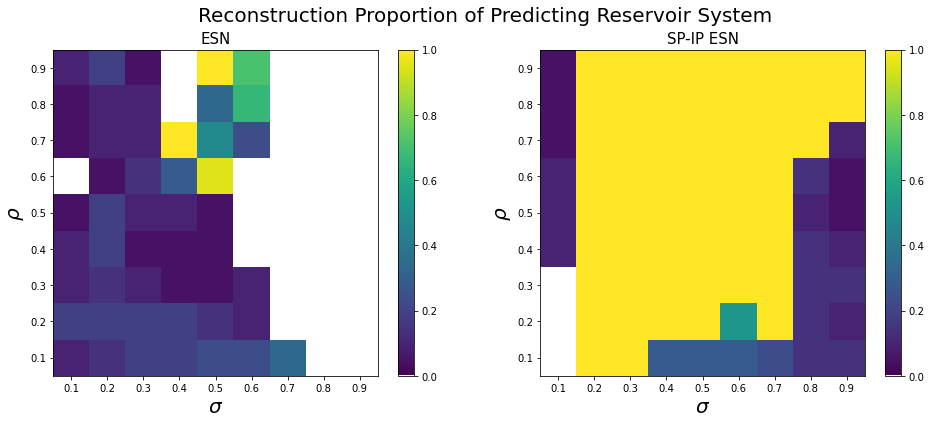

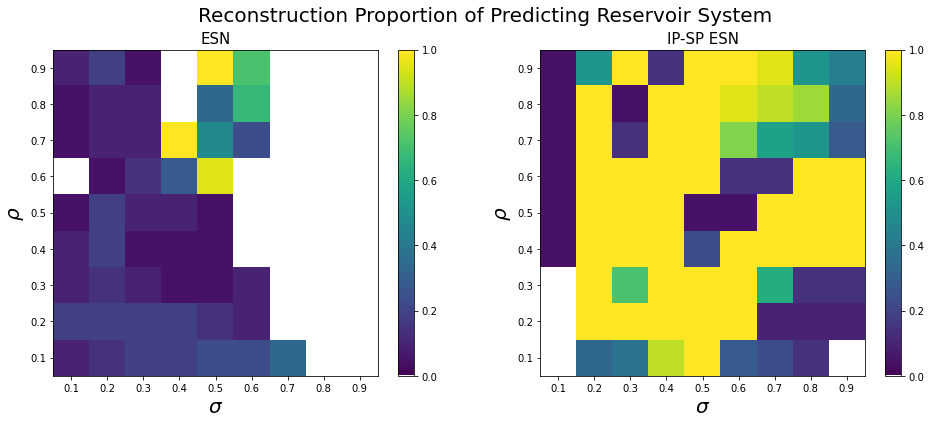

In [269]:
rp_plots(ESN_rp_mat, SP_rp_mat, 'SP ESN')
rp_plots(ESN_rp_mat, IP_rp_mat, 'IP ESN')
rp_plots(ESN_rp_mat, SP_IP_rp_mat, 'SP-IP ESN')
rp_plots(ESN_rp_mat, IP_SP_rp_mat, 'IP-SP ESN')

In [272]:
matrix_list = [ESN_ua_mat, SP_ua_mat, IP_ua_mat, SP_IP_ua_mat, IP_SP_ua_mat]

titles = ["ESN", "SP ESN", "IP ESN", "SP-IP ESN", "IP-SP ESN"]

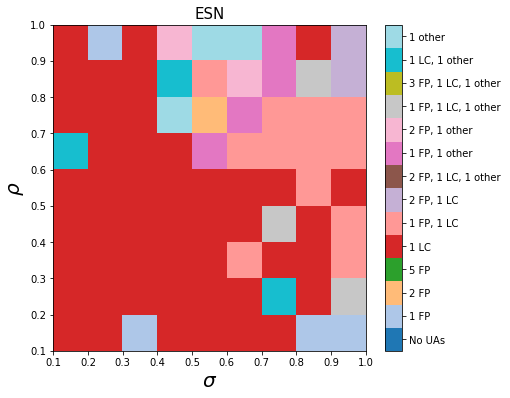

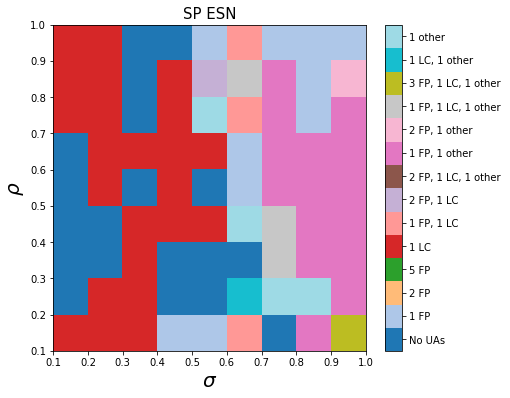

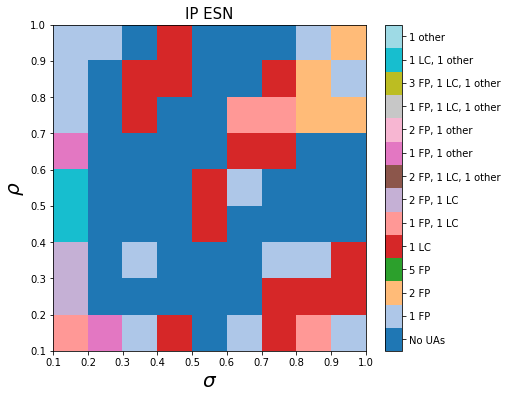

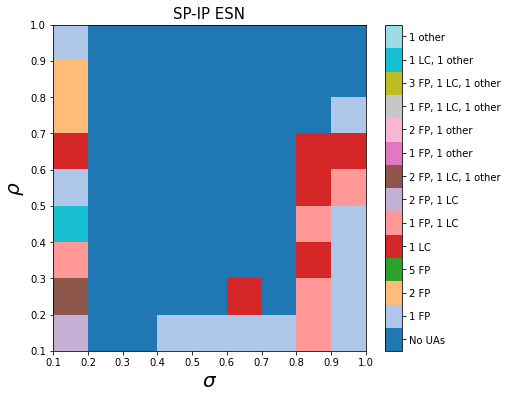

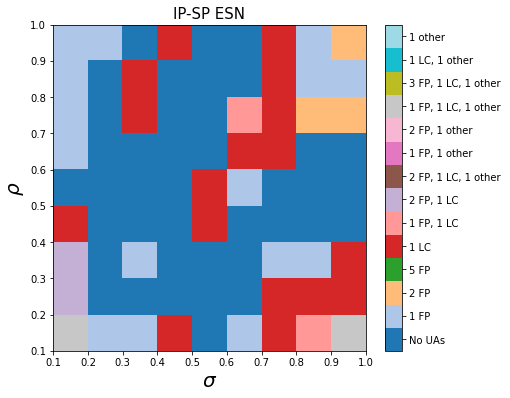

In [281]:
for i in range(len(matrix_list)):
    fig, ax = plt.subplots(figsize=(7,6))
    M = matrix_list[i]
    plt.imshow(M,
               origin='lower', extent=[0.1, 1.0, 0.1, 1.0], 
               aspect='auto',
               cmap=plt.cm.get_cmap('tab20', 14))

    formatter = plt.FuncFormatter(lambda val, loc: tuple_to_label(rev_encoding[val]))

    # We must be sure to specify the ticks matching our target names
    plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], format=formatter);

    # Set the clim so that labels are centered on each block
    plt.clim(-0.5, 13.5)

    plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

    plt.xlabel(r'$\sigma$', fontsize=20)
    plt.ylabel(r'$\rho$', fontsize=20)
    plt.title(titles[i], fontsize=15)

Text(0.5, 1.0, 'ESN')

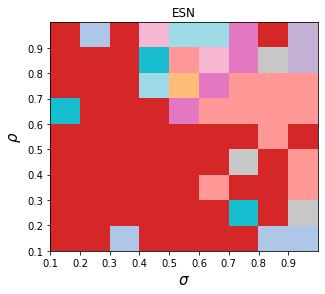

In [381]:
fig, ax = plt.subplots(figsize=(4.8,4.2))
ua_mat = ESN_ua_mat
plt.imshow(ua_mat,
           origin='lower', extent=[0.1, 1.0, 0.1, 1.0], 
           aspect='auto',
           cmap=plt.cm.get_cmap('tab20', 14))

formatter = plt.FuncFormatter(lambda val, loc: tuple_to_label(rev_encoding[val]))

# We must be sure to specify the ticks matching our target names
#plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], format=formatter);

# Set the clim so that labels are centered on each block
plt.clim(-0.5, 13.5)

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.xlabel(r'$\sigma$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.title('ESN')
#plt.title("Untrained attractors in predicting reservoir state space", fontsize=20)

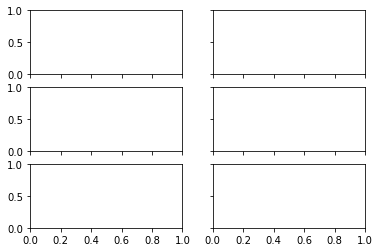

In [383]:
fig, ax = plt.subplots(3, 2, sharex='col', sharey='row')

Text(0.5, 1.0, 'ESN')

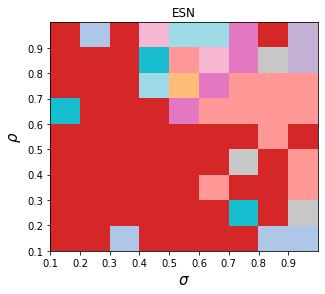

In [384]:
fig, ax = plt.subplots(figsize=(4.8,4.2))
ua_mat = ESN_ua_mat
plt.imshow(ua_mat,
           origin='lower', extent=[0.1, 1.0, 0.1, 1.0], 
           aspect='auto',
           cmap=plt.cm.get_cmap('tab20', 14))

formatter = plt.FuncFormatter(lambda val, loc: tuple_to_label(rev_encoding[val]))

# We must be sure to specify the ticks matching our target names
#plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], format=formatter);

# Set the clim so that labels are centered on each block
plt.clim(-0.5, 13.5)

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.xlabel(r'$\sigma$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.title('ESN')
#plt.title("Untrained attractors in predicting reservoir state space", fontsize=20)

Text(0.5, 1.0, 'SP ESN')

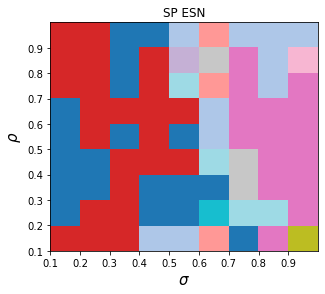

In [387]:
fig, ax = plt.subplots(figsize=(4.8,4.2))
ua_mat = SP_ua_mat
plt.imshow(ua_mat,
           origin='lower', extent=[0.1, 1.0, 0.1, 1.0], 
           aspect='auto',
           cmap=plt.cm.get_cmap('tab20', 14))

formatter = plt.FuncFormatter(lambda val, loc: tuple_to_label(rev_encoding[val]))

# We must be sure to specify the ticks matching our target names
#plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], format=formatter);

# Set the clim so that labels are centered on each block
plt.clim(-0.5, 13.5)

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.xlabel(r'$\sigma$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.title('SP ESN')
#plt.title("Untrained attractors in predicting reservoir state space", fontsize=20)



Text(0.5, 1.0, 'IP ESN')

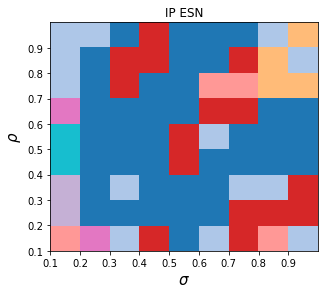

In [388]:
fig, ax = plt.subplots(figsize=(4.8,4.2))
ua_mat = IP_ua_mat
plt.imshow(ua_mat,
           origin='lower', extent=[0.1, 1.0, 0.1, 1.0], 
           aspect='auto',
           cmap=plt.cm.get_cmap('tab20', 14))

formatter = plt.FuncFormatter(lambda val, loc: tuple_to_label(rev_encoding[val]))

# We must be sure to specify the ticks matching our target names
#plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], format=formatter);

# Set the clim so that labels are centered on each block
plt.clim(-0.5, 13.5)

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.xlabel(r'$\sigma$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.title('IP ESN')
#plt.title("Untrained attractors in predicting reservoir state space", fontsize=20)



Text(0.5, 1.0, 'SP-IP ESN')

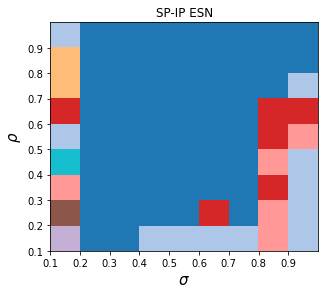

In [389]:
fig, ax = plt.subplots(figsize=(4.8,4.2))
ua_mat = SP_IP_ua_mat
plt.imshow(ua_mat,
           origin='lower', extent=[0.1, 1.0, 0.1, 1.0], 
           aspect='auto',
           cmap=plt.cm.get_cmap('tab20', 14))

formatter = plt.FuncFormatter(lambda val, loc: tuple_to_label(rev_encoding[val]))

# We must be sure to specify the ticks matching our target names
#plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], format=formatter);

# Set the clim so that labels are centered on each block
plt.clim(-0.5, 13.5)

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.xlabel(r'$\sigma$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.title('SP-IP ESN')
#plt.title("Untrained attractors in predicting reservoir state space", fontsize=20)



Text(0.5, 1.0, 'IP-SP ESN')

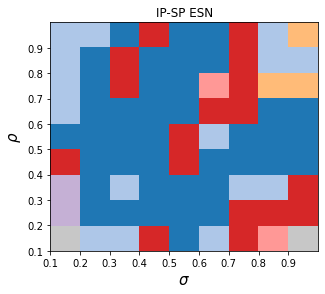

In [391]:
fig, ax = plt.subplots(figsize=(4.8,4.2))
ua_mat = IP_SP_ua_mat
plt.imshow(ua_mat,
           origin='lower', extent=[0.1, 1.0, 0.1, 1.0], 
           aspect='auto',
           cmap=plt.cm.get_cmap('tab20', 14))

formatter = plt.FuncFormatter(lambda val, loc: tuple_to_label(rev_encoding[val]))

# We must be sure to specify the ticks matching our target names
#plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], format=formatter);

# Set the clim so that labels are centered on each block
plt.clim(-0.5, 13.5)

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.xlabel(r'$\sigma$', fontsize=15)
plt.ylabel(r'$\rho$', fontsize=15)
plt.title('IP-SP ESN')
#plt.title("Untrained attractors in predicting reservoir state space", fontsize=20)



AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

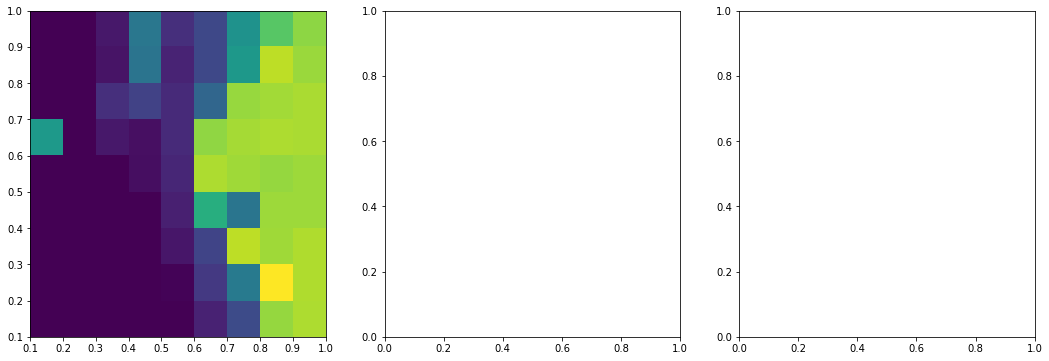

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

im = ax[0].imshow(ESN_TPE_mat,
                origin='lower', extent=[0.1, 1.0, 0.1, 1.0],
                vmax=ESN_TPE_mat.max(), vmin=0,
                aspect='auto',
                cmap=plt.cm.get_cmap('viridis'))

ax[0].colorbar();

ax[0].xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
ax[0].yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

ax[0].xlabel(r'$\sigma$', fontsize=20)
ax[0].ylabel(r'$\rho$', fontsize=20)
ax[0].title("Prediction log TPE", fontsize=20)